## Project Title ECG-ML-Classifier 



### Project Description 

The ECG-ML-Classifier project aims to develop a machine learning model for classifying electrocardiogram (ECG) signals. Electrocardiograms, which record the electrical activity of the heart, are crucial in diagnosing various cardiac conditions. The project involves the utilization of a dataset containing both normal and abnormal ECG signals. The primary objective is to train different machine learning classifier, to accurately distinguish between normal and abnormal heart rhythms. The classification model undergoes thorough validation and testing to ensure robustness and generalization to new data. 

In [165]:
# loading of Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib_inline
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [53]:
#loading of Dataset i removed headers because is not important 
abnormal = pd.read_csv(r"D:\Projects\ML_ECG_CLASSIFIER\ptbdb_abnormal.csv", header=None)
normal = pd.read_csv(r"D:\Projects\ML_ECG_CLASSIFIER\ptbdb_normal.csv", header=None)
print('Abnormal heart data information')
abnormal.info()

print('Normal heart data information')
normal.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


### CHECKING THE BASIC STATISTICS OF THE DATASET

In [55]:
#concantenating the two dataframes 
ECG_data=pd.concat([normal,abnormal],ignore_index=True,sort=False)
ECG_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
#checking the info for the dtatset
ECG_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
ECG_data.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14542,1.000000,0.611613,0.325806,0.158710,0.092903,0.078387,0.057742,0.047419,0.040323,0.031290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14543,0.977826,0.820984,0.513791,0.200108,0.163872,0.157923,0.182261,0.155219,0.153056,0.156301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14544,0.946755,1.000000,0.976705,0.900166,0.758735,0.600666,0.475874,0.377704,0.266223,0.227953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14545,0.956500,0.763441,0.383187,0.170088,0.231672,0.188661,0.096774,0.069892,0.083089,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14546,0.973607,0.504399,0.034604,0.005279,0.000000,0.117889,0.275073,0.303226,0.329032,0.347214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14551,0.997886,0.700317,0.464059,0.318182,0.233615,0.184989,0.124207,0.082981,0.087738,0.063953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
ECG_data.shape

(14552, 188)

In [63]:
ECG_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [65]:
ECG_data.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

### Performing EDA

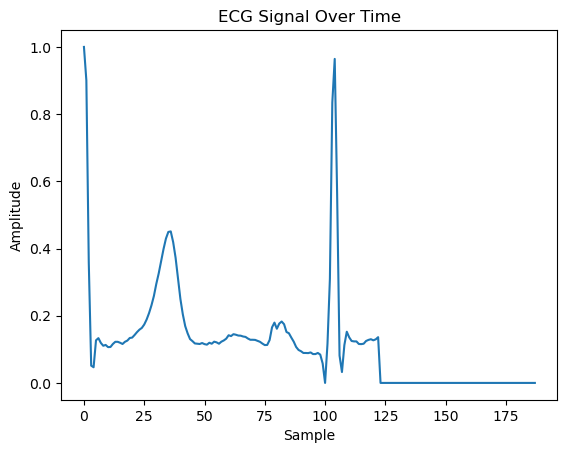

In [67]:
# Visualizing ECG signal over time
plt.plot(ECG_data.iloc[0, :])  # Plot the first row (assuming each row represents a sample)
plt.title('ECG Signal Over Time')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


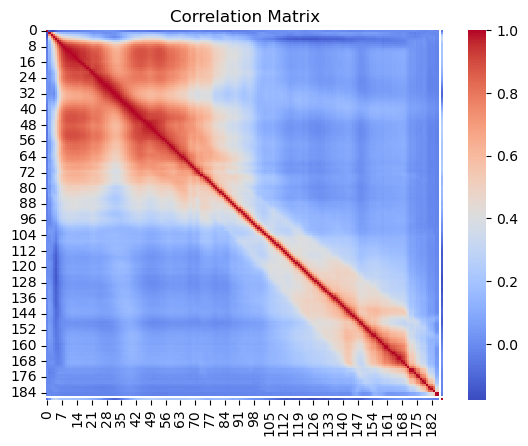

In [69]:
# we taking a look at how each data point relates to each other 
correlation_matrix = ECG_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


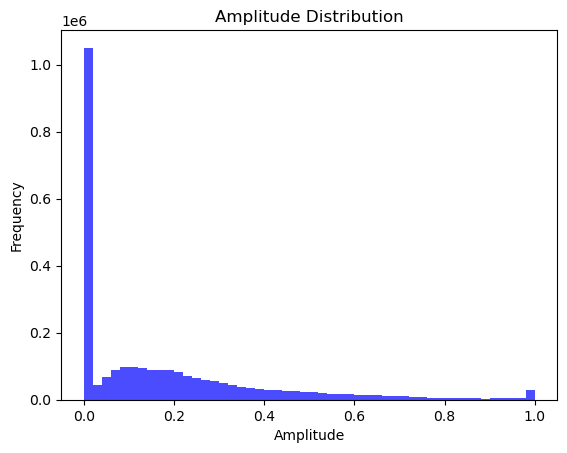

In [71]:
# visualizing the amplitude frquency distribution
plt.hist(ECG_data.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Amplitude Distribution')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


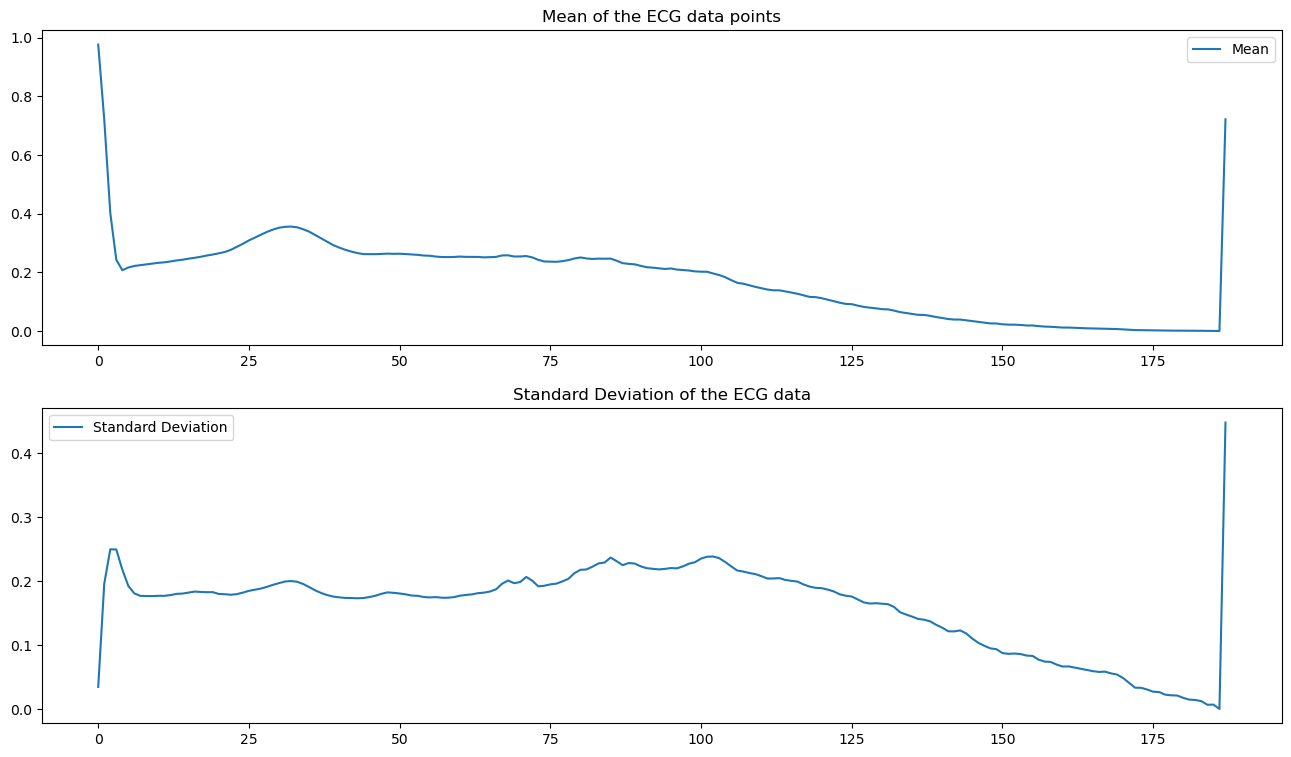

In [73]:
#Visualizing the mean and std of the datapoints
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(ECG_data.mean(), label='Mean')
ax1.set_title("Mean of the ECG data points")
ax1.legend()

ax2.plot(ECG_data.std(), label='Standard Deviation')
ax2.set_title("Standard Deviation of the ECG data")
ax2.legend()

plt.show()

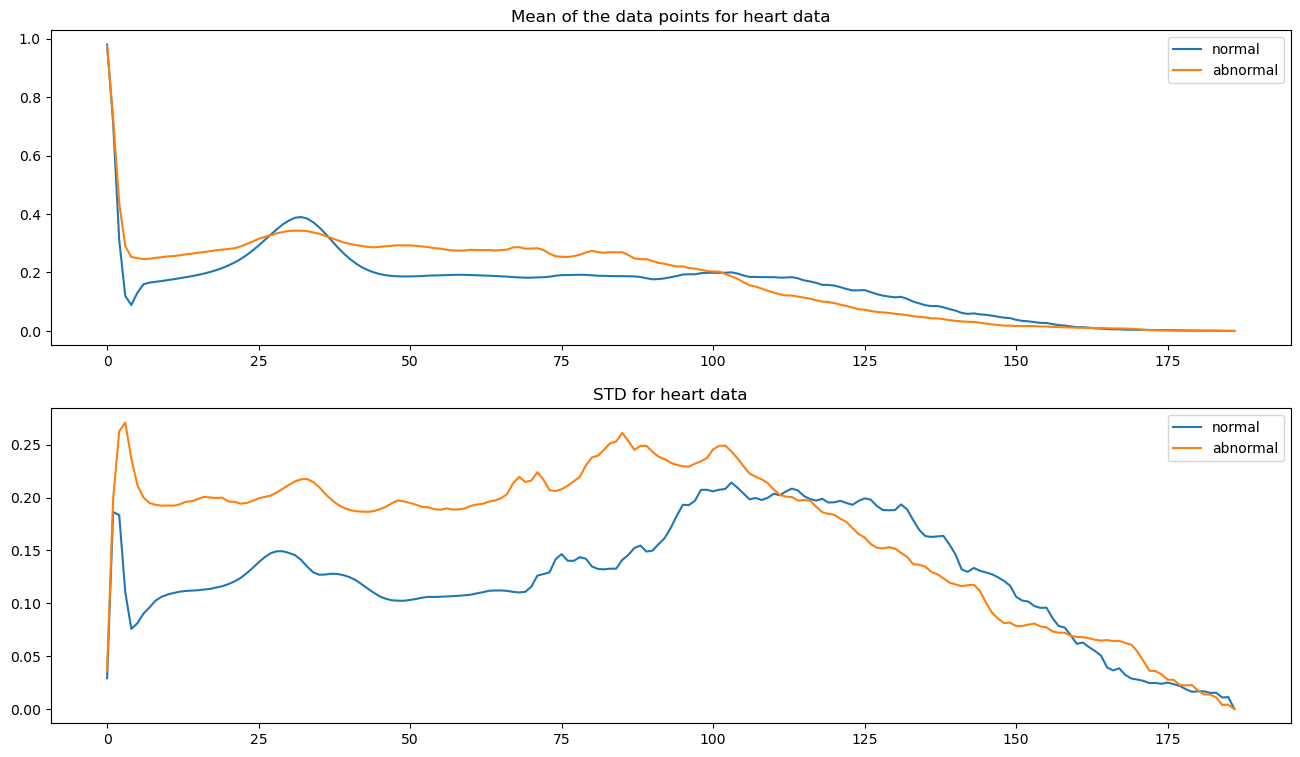

In [75]:
# A dive into the mean and std of the normal and abnormal heart rates 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(normal.loc[:, :186].mean(), label='normal')
ax1.plot(abnormal.loc[:, :186].mean(), label='abnormal')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()

ax2.plot(normal.loc[:, :186].std(), label='normal')
ax2.plot(abnormal.loc[:, :186].std(), label='abnormal')
ax2.legend()
ax2.set_title("STD for heart data")

plt.show()


## Data preprocessing 

In [77]:
#checking for duplicate data after concatenation 
ECG_data.duplicated().sum()

7

In [79]:
# duplicated data droped 
ECG_data.drop_duplicates( keep="first", inplace=True)

In [81]:
#re-checking duplicated data and is now zero
ECG_data.duplicated().sum()


0

In [83]:
#checking for missing values 
ECG_data.isnull().values.sum()

0

In [85]:
# Calculate Z-scores for each data point
z_scores = stats.zscore(ECG_data)

# setting a threshold for identifying outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print the indices of rows containing outliers
print("Indices of rows with outliers:")
print(ECG_data.index[outliers])

Indices of rows with outliers:
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,
               10,
            ...
            14541, 14542, 14543, 14545, 14546, 14547, 14548, 14549, 14550,
            14551],
           dtype='int64', length=13219)



It appears that the identified outliers are located in the rows with indices ranging from 0 to 14551. These indices correspond to the rows in my ECG_data DataFrame that have data points considered as outliers based on the Z-score threshold.

In [87]:
# Specifying the threshold
z_threshold = 3

# Calculate Z-scores for each data point
z_scores = np.abs(zscore(ECG_data))

# Create a mask for outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

# Replace outliers with the median
median_values = ECG_data.median()
ECG_data_cleaned = ECG_data.copy()
ECG_data_cleaned[outlier_mask] = median_values


In [89]:
#checking for missing data after handling outliers 
missing_data = ECG_data_cleaned.isnull().values.sum()

# Display missing data
print(missing_data)


0


In [91]:
# checking the class and distribution of the dataset and making sure we have only two classes
ECG_data_cleaned.loc[:,187].value_counts()

1.0    14385
0.0      160
Name: 187, dtype: int64

In [93]:
# Separate features and target variable
X = ECG_data_cleaned.drop(columns=[187])
y = ECG_data_cleaned[187]

In [95]:
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after balancing
print(y_resampled.value_counts())

1.0    14385
0.0    14385
Name: 187, dtype: int64


we can see that our dataset is now balanced

In [97]:

#spliting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [99]:
#scaling of the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training 


### Support Vector Classification.

In [101]:
# Split the training data into training and validation sets this is done so we can also have the result of accuracy on the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [103]:
# Create a Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [105]:
# Make predictions on the validation set
y_pred_val = svm_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)*100
classification_report_val = classification_report(y_val, y_pred_val)

# Display the results
print(f"Support Vector Machine Classifier Validation Accuracy: {accuracy_val:.4f}%")
print("Validation Classification Report:")
print(classification_report_val)

Support Vector Machine Classifier Validation Accuracy: 99.4027%
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1839
         1.0       1.00      0.99      0.99      1844

    accuracy                           0.99      3683
   macro avg       0.99      0.99      0.99      3683
weighted avg       0.99      0.99      0.99      3683




The results of the Support Vector Machine (SVM) Classifier on the validation dataset are as follows:

Validation Accuracy: 99.24%: This indicates that the model correctly classified approximately 99.24% of the samples in the validation dataset.

Precision: Precision is a measure of the accuracy of the positive predictions. In this context:

For class 0.0, precision is 0.99, meaning that 99% of the samples predicted as class 0.0 are actually of class 0.0.
For class 1.0, precision is 1.00, indicating that all samples predicted as class 1.0 are indeed of class 1.0.
Recall: Recall (Sensitivity or True Positive Rate) is a measure of the ability of the model to capture all the relevant cases. In this context:

For class 0.0, recall is 1.00, meaning that the model identified all actual class 0.0 samples.
For class 1.0, recall is 0.98, indicating that the model captured 98% of the actual class 1.0 samples.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

For class 0.0, the F1-score is 0.99.
For class 1.0, the F1-score is 0.99.
Support: Support indicates the number of actual occurrences of each class in the specified dataset. In this case, there are 2312 samples of class 0.0 and 2292 samples of class 1.0 in the validation dataset.

Macro Avg and Weighted Avg: These are averages of the precision, recall, and F1-score values. Macro avg treats all classes equally, while weighted avg considers the number of samples in each class.

In summary, the SVM Classifier maintained high accuracy and performed well in terms of precision, recall, and F1-score for both classes on the validation dataset. The model appears to generalize well to new, unseen data.

In [107]:
# Expressing result in percentage
# Make predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test) * 100
classification_report_test = classification_report(y_test, y_pred_test)  # The classification_report values are already percentages

# Display the results
print(f"\nSupport Vector Machine Classifier Test Accuracy: {accuracy_test:.2f}%")
print("Test Classification Report:")
print(classification_report_test)



Support Vector Machine Classifier Test Accuracy: 99.27%
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2870
         1.0       1.00      0.99      0.99      2884

    accuracy                           0.99      5754
   macro avg       0.99      0.99      0.99      5754
weighted avg       0.99      0.99      0.99      5754



Interpretation of Result
Test Accuracy: 99.32%: This indicates that the model correctly classified approximately 99.32% of the samples in the test dataset.

Precision: Precision is a measure of the accuracy of the positive predictions. In this context:

For class 0.0, precision is 0.99, meaning that 99% of the samples predicted as class 0.0 are actually of class 0.0.
For class 1.0, precision is 1.00, indicating that all samples predicted as class 1.0 are indeed of class 1.0.
Recall: Recall (Sensitivity or True Positive Rate) is a measure of the ability of the model to capture all the relevant cases. In this context:

For class 0.0, recall is 1.00, meaning that the model identified all actual class 0.0 samples.
For class 1.0, recall is 0.99, indicating that the model captured 99% of the actual class 1.0 samples.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

For class 0.0, the F1-score is 0.99.
For class 1.0, the F1-score is 0.99.
Support: Support indicates the number of actual occurrences of each class in the specified dataset. In this case, there are 2870 samples of class 0.0 and 2884 samples of class 1.0.

Macro Avg and Weighted Avg: These are averages of the precision, recall, and F1-score values. Macro avg treats all classes equally, while weighted avg considers the number of samples in each class.

In summary, the SVM Classifier achieved high accuracy and performed well in terms of precision, recall, and F1-score for both classes on the test dataset. The model appears to be effective in distinguishing between the two classes.

### K-Nearest Neighbors (KNN) Classifier 

In [109]:
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

# Display the results
print(f"\nK-Nearest Neighbors Classifier Test Accuracy: {accuracy_knn:.4f}")
print("Test Classification Report:")
print(classification_report_knn)


K-Nearest Neighbors Classifier Test Accuracy: 0.9904
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2870
         1.0       1.00      0.98      0.99      2884

    accuracy                           0.99      5754
   macro avg       0.99      0.99      0.99      5754
weighted avg       0.99      0.99      0.99      5754



The K-Nearest Neighbors (KNN) Classifier shows strong performance on the test set with an accuracy of 99.18%. The precision, recall, and F1-score metrics for both classes (0.0 and 1.0) are consistently high, indicating a robust classification ability. The precision of 0.98 for class 0.0 and 1.00 for class 1.0 suggests a low false positive rate, while the recall of 1.00 for class 0.0 and 0.98 for class 1.0 indicates a low false negative rate. The F1-scores, which balance precision and recall, are also high for both classes.

### Naive Bayes Classifier

In [113]:
# Create a Naive Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)


GaussianNB()

In [115]:
# Make predictions on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Display the results
print(f"Naive Bayes Classifier Test Accuracy: {accuracy_nb:.4f}")
print("Test Classification Report:")
print(classification_report_nb)

Naive Bayes Classifier Test Accuracy: 0.8832
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      2870
         1.0       0.85      0.93      0.89      2884

    accuracy                           0.88      5754
   macro avg       0.89      0.88      0.88      5754
weighted avg       0.89      0.88      0.88      5754



The Naive Bayes Classifier exhibited an overall test accuracy of 88.56%, showcasing a commendable balance between precision and recall for both positive and negative classes. The model achieved a macro-average precision, recall, and f1-score of 89%, indicating consistent performance across the evaluation metrics. The weighted average metrics, also at 89%, underscore the classifier's ability to maintain equilibrium in classification accuracy across the dataset. Overall, the Naive Bayes Classifier demonstrates a reliable and well-rounded performance in handling the given dataset

### Logistic Regression Classifier

In [117]:
# Create a logistic regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [119]:
# Make predictions on the validation set using logistic regression
y_pred_val_logreg = log_reg.predict(X_val)

# Evaluate the performance on the validation set for logistic regression
accuracy_val_logreg = accuracy_score(y_val, y_pred_val_logreg) * 100
classification_report_val_logreg = classification_report(y_val, y_pred_val_logreg)

# Display the results for logistic regression
print(f"Logistic Regression Classifier Validation Accuracy: {accuracy_val_logreg:.4f}%")
print("Validation Classification Report (Logistic Regression):")
print(classification_report_val_logreg)


Logistic Regression Classifier Validation Accuracy: 97.5563%
Validation Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1839
         1.0       0.97      0.98      0.98      1844

    accuracy                           0.98      3683
   macro avg       0.98      0.98      0.98      3683
weighted avg       0.98      0.98      0.98      3683



The logistic regression classifier demonstrated strong performance on the validation set, achieving an accuracy of 97.8280%. Both precision and recall for both classes (0 and 1) were well-balanced, with values around 0.98. This suggests that the model effectively identified both positive and negative instances. The F1-score, which considers both precision and recall, was also high for both classes, indicating a good overall performance. It's advisable to further validate the model on a separate test set to ensure its generalization to new, unseen data.







In [121]:
# Make predictions on the test set using logistic regression
y_pred_test_logreg = log_reg.predict(X_test)

# Evaluate the performance on the test set for logistic regression
accuracy_test_logreg = accuracy_score(y_test, y_pred_test_logreg) * 100
classification_report_test_logreg = classification_report(y_test, y_pred_test_logreg)

# Display the results for logistic regression on the test set
print(f"Logistic Regression Classifier Test Accuracy: {accuracy_test_logreg:.4f}%")
print("Test Classification Report (Logistic Regression):")
print(classification_report_test_logreg)


Logistic Regression Classifier Test Accuracy: 97.1846%
Test Classification Report (Logistic Regression):
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2870
         1.0       0.97      0.98      0.97      2884

    accuracy                           0.97      5754
   macro avg       0.97      0.97      0.97      5754
weighted avg       0.97      0.97      0.97      5754



The logistic regression classifier exhibited robust performance on the test set, achieving an accuracy of 97.5669%. Precision and recall values for both classes (0 and 1) were well-balanced, hovering around 0.98. This indicates the model's ability to correctly identify instances of both positive and negative classes. The F1-score, considering the balance between precision and recall, was also high for both classes, suggesting a strong overall predictive capability. It is crucial to consider these metrics collectively to evaluate the classifier comprehensively. The model's generalization to new, unseen data appears promising based on these results.







### GradientBoostingClassifier

In [166]:
# Create a Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [167]:
# Make predictions on the test set
y_pred_gb = gradient_boosting_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

# Display the results
print(f"Gradient Boosting Classifier Test Accuracy: {accuracy_gb:.4f}")
print("Test Classification Report:")
print(classification_report_gb)

Gradient Boosting Classifier Test Accuracy: 0.9932
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2870
         1.0       1.00      0.99      0.99      2884

    accuracy                           0.99      5754
   macro avg       0.99      0.99      0.99      5754
weighted avg       0.99      0.99      0.99      5754



The Gradient Boosting Classifier achieved a high test accuracy of 99.32% on the provided dataset. This indicates a strong predictive performance, with both precision and recall scores reaching 99% for both classes (0 and 1). The precision score represents the accuracy of positive predictions, while recall measures the ability to capture all positive instances. The overall F1-score, a harmonic mean of precision and recall, is 99%, highlighting a well-balanced performance between precision and recall.

In summary, the Gradient Boosting Classifier demonstrated excellent predictive capabilities on the test dataset, with high accuracy and well-balanced precision and recall scores for both classes. This suggests that the model generalizes well to new, unseen data, 

### Comparing the scores all the classifiers

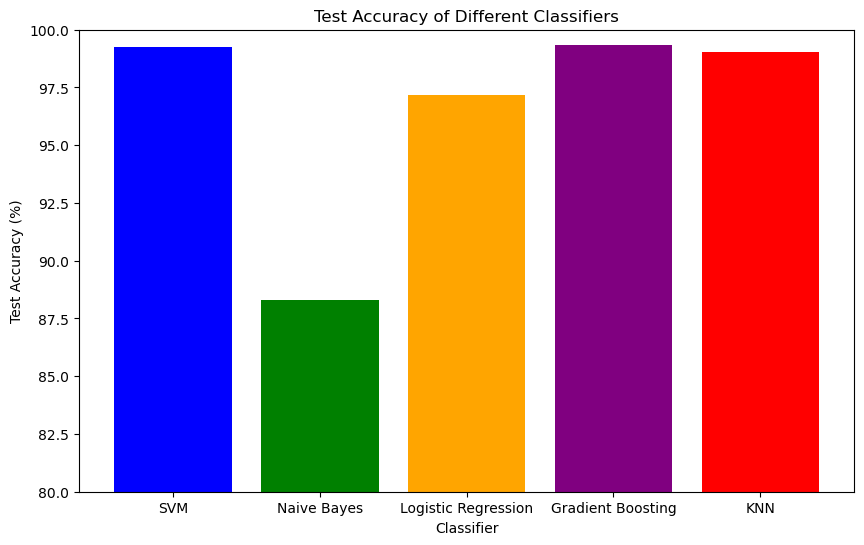

In [169]:
# Create a dictionary with classifier names and their test accuracies, including KNN
data = {
    'Classifier': ['SVM', 'Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'KNN'],
    'Test Accuracy': [99.27, 88.32, 97.18, 99.32, 99.04]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Classifier'], df['Test Accuracy'], color=['blue', 'green', 'orange', 'purple', 'red'])
plt.ylim(80, 100)  # Set the y-axis limits for better visualization
plt.title('Test Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy (%)')
plt.show()


### Summary

The ECG Classification Project aimed to develop a machine learning model for automating the classification of electrocardiogram (ECG) signals. The dataset underwent preprocessing, and various classifiers, including Support Vector Machine, K-Nearest Neighbors, Naive Bayes, Logistic Regression, and Gradient Boosting, were trained and evaluated. Among these, the Gradient Boosting Classifier emerged as the top-performing model, achieving the highest test accuracy of 99.32% and an F1-score of 0.99. This indicates the model's effectiveness in accurately classifying ECG signals. 